# Minimum free energy paths in 2D free energy landscape computed from MD simulation trajectories

## Two-basin potential

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import stringmethod

In [2]:
xvals = []
yvals = []

with open("traj_slip.dat") as f:
    for line in f:
        if line.strip()[0] != '#':
            vals = [float(val) for val in line.strip().split()]
            xvals.append(vals[1])
            yvals.append(vals[2])

xvals = np.array(xvals)
yvals = np.array(yvals)

counts, xbins, ybins = np.histogram2d(xvals, yvals, bins=[100, 100], range=[[-12, 15], [-6, 8]])
counts[counts == 0] = counts[counts != 0].min()
betaF = -np.log(counts)
betaF = betaF - np.min(betaF)

In [3]:
S = stringmethod.String2D(xbins[:-1], ybins[:-1], betaF, indexing='ij')

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee93aac4d0>)

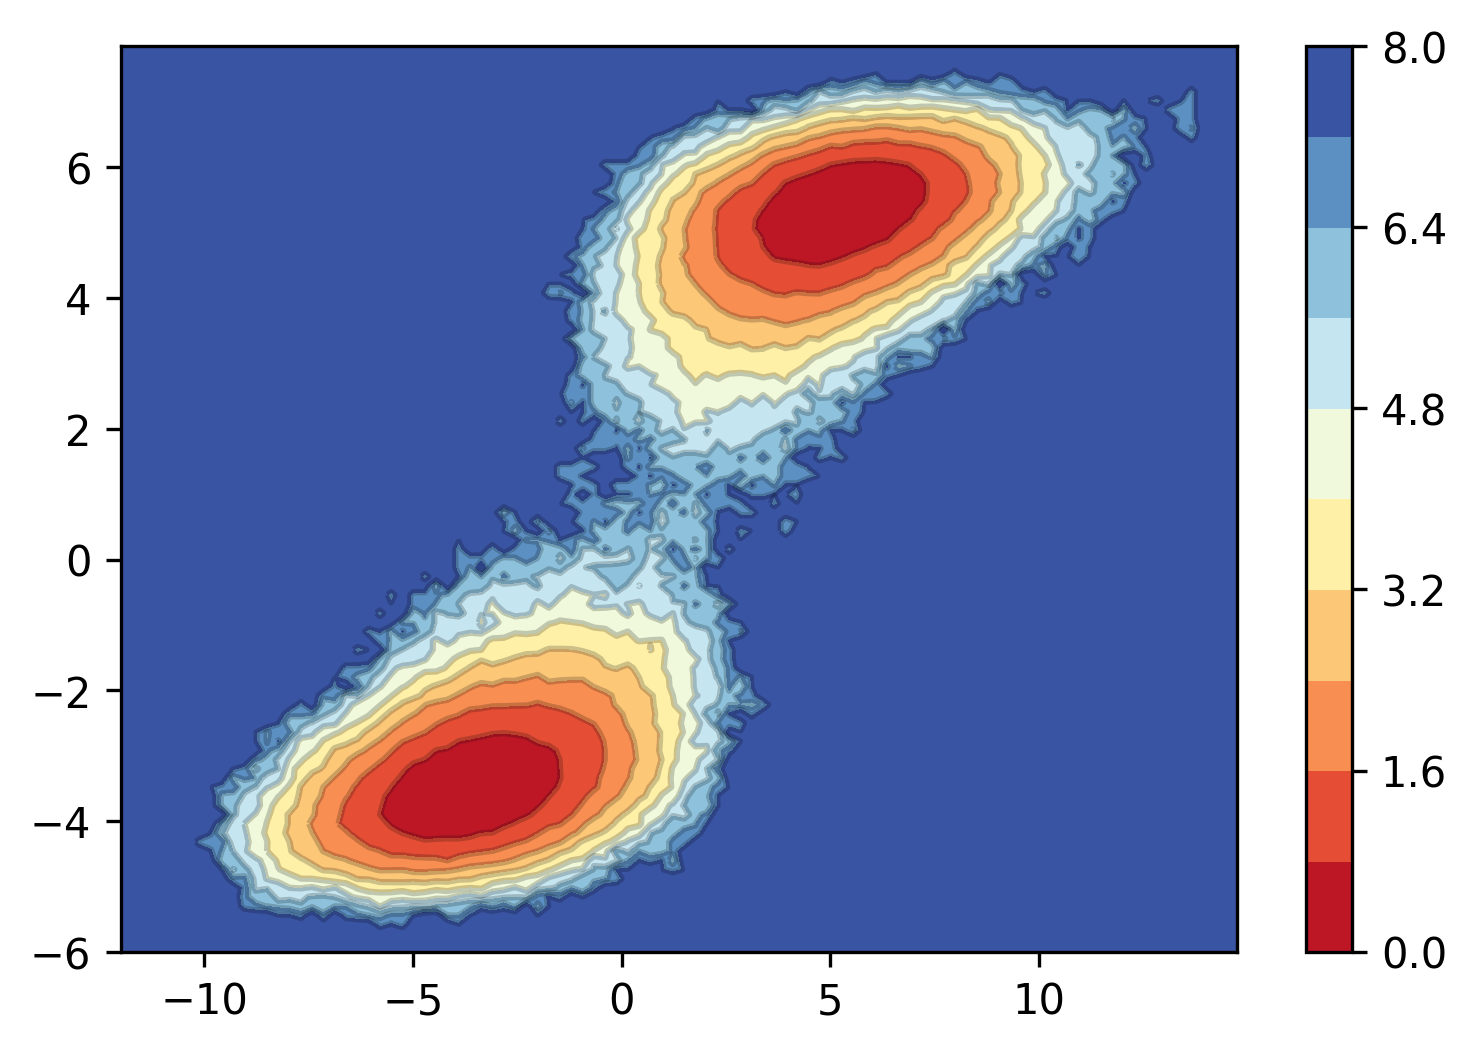

In [4]:
S.plot_V(clip_max=8, levels=10)

In [5]:
S.compute_mep(begin=[-4, -4], mid=[[2, 1]], end=[5, 6], maxsteps=200, traj_every=10)

  5%|██                                        | 10/200 [00:05<01:30,  2.09it/s]

Change in string: 0.0140653859


 10%|████▏                                     | 20/200 [00:08<01:07,  2.66it/s]

Change in string: 0.0194442353


 15%|██████▎                                   | 30/200 [00:13<01:05,  2.58it/s]

Change in string: 0.0109700356


 20%|████████▍                                 | 40/200 [00:17<00:59,  2.70it/s]

Change in string: 0.0083636096


 25%|██████████▌                               | 50/200 [00:21<01:09,  2.17it/s]

Change in string: 0.0152462781


 30%|████████████▌                             | 60/200 [00:25<00:53,  2.64it/s]

Change in string: 0.0067914439


 35%|██████████████▋                           | 70/200 [00:29<00:50,  2.57it/s]

Change in string: 0.0052142989


 40%|████████████████▊                         | 80/200 [00:33<01:00,  2.00it/s]

Change in string: 0.0074183785


 45%|██████████████████▉                       | 90/200 [00:40<01:19,  1.38it/s]

Change in string: 0.0220797301


 50%|████████████████████▌                    | 100/200 [00:47<01:06,  1.51it/s]

Change in string: 0.0029576906


 55%|██████████████████████▌                  | 110/200 [00:52<00:47,  1.90it/s]

Change in string: 0.0063133077


 60%|████████████████████████▌                | 120/200 [00:57<00:33,  2.35it/s]

Change in string: 0.0074941189


 65%|██████████████████████████▋              | 130/200 [01:01<00:28,  2.47it/s]

Change in string: 0.0088530875


 70%|████████████████████████████▋            | 140/200 [01:05<00:25,  2.37it/s]

Change in string: 0.0051948147


 75%|██████████████████████████████▊          | 150/200 [01:10<00:23,  2.15it/s]

Change in string: 0.0033314752


 80%|████████████████████████████████▊        | 160/200 [01:15<00:19,  2.07it/s]

Change in string: 0.0015122867


 85%|██████████████████████████████████▊      | 170/200 [01:20<00:12,  2.34it/s]

Change in string: 0.0026307972


 90%|████████████████████████████████████▉    | 180/200 [01:24<00:10,  1.84it/s]

Change in string: 0.0056015810


 95%|██████████████████████████████████████▉  | 190/200 [01:29<00:04,  2.22it/s]

Change in string: 0.0198369585


100%|█████████████████████████████████████████| 200/200 [01:34<00:00,  2.13it/s]

Change in string: 0.0113794212


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee93c1b7d0>)

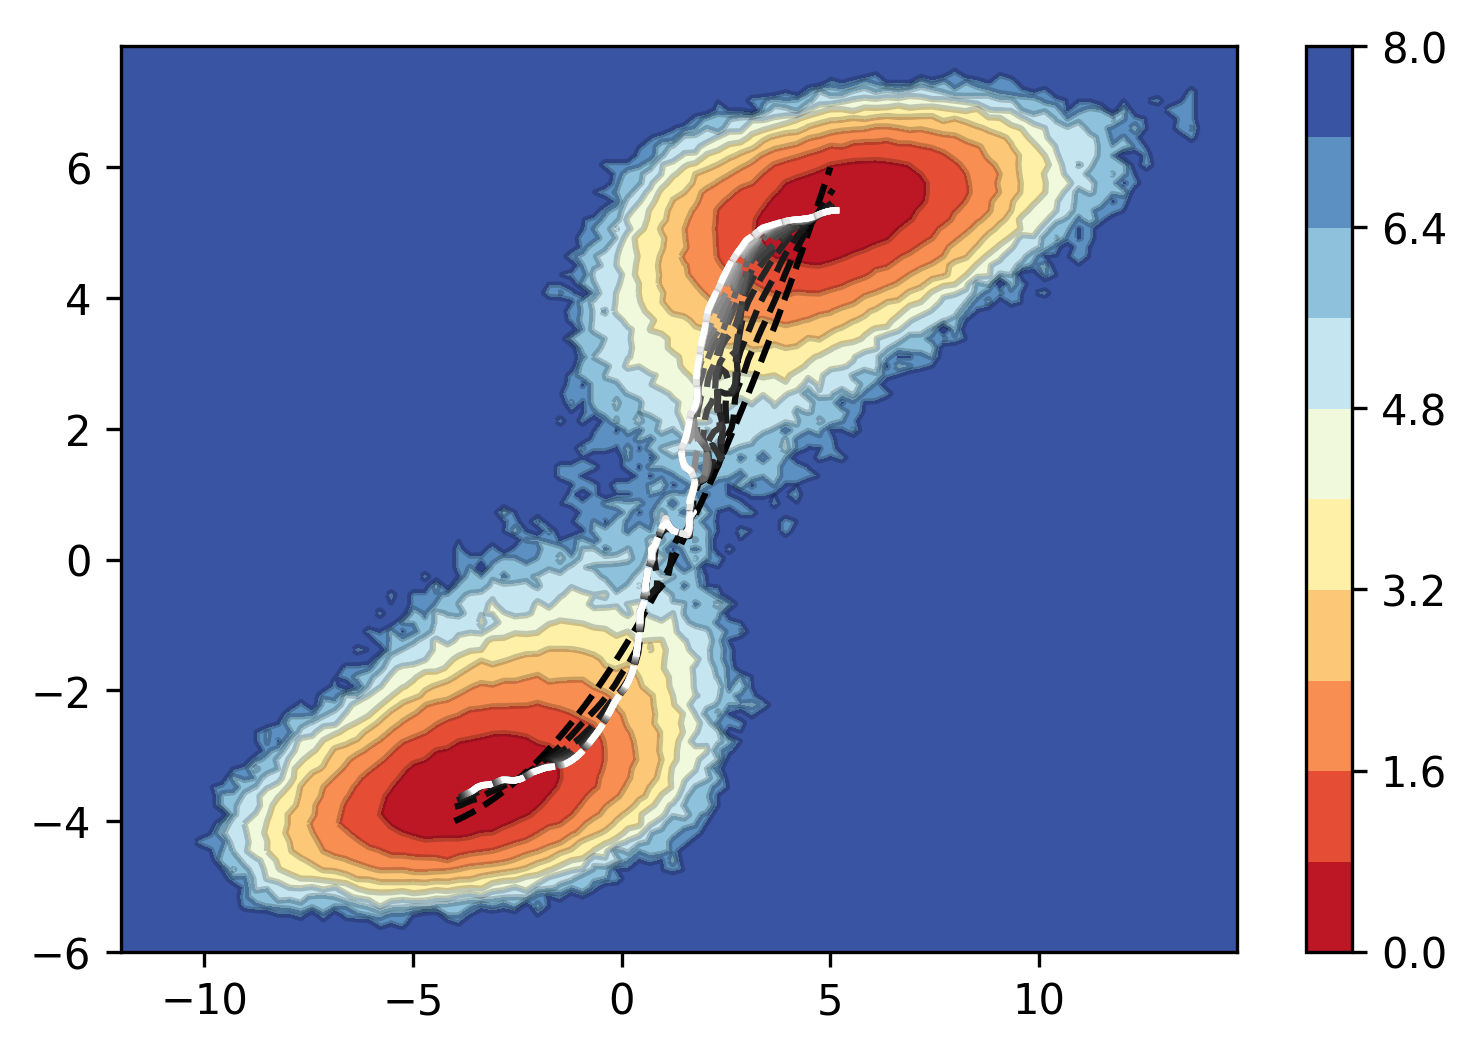

In [6]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee93d79150>)

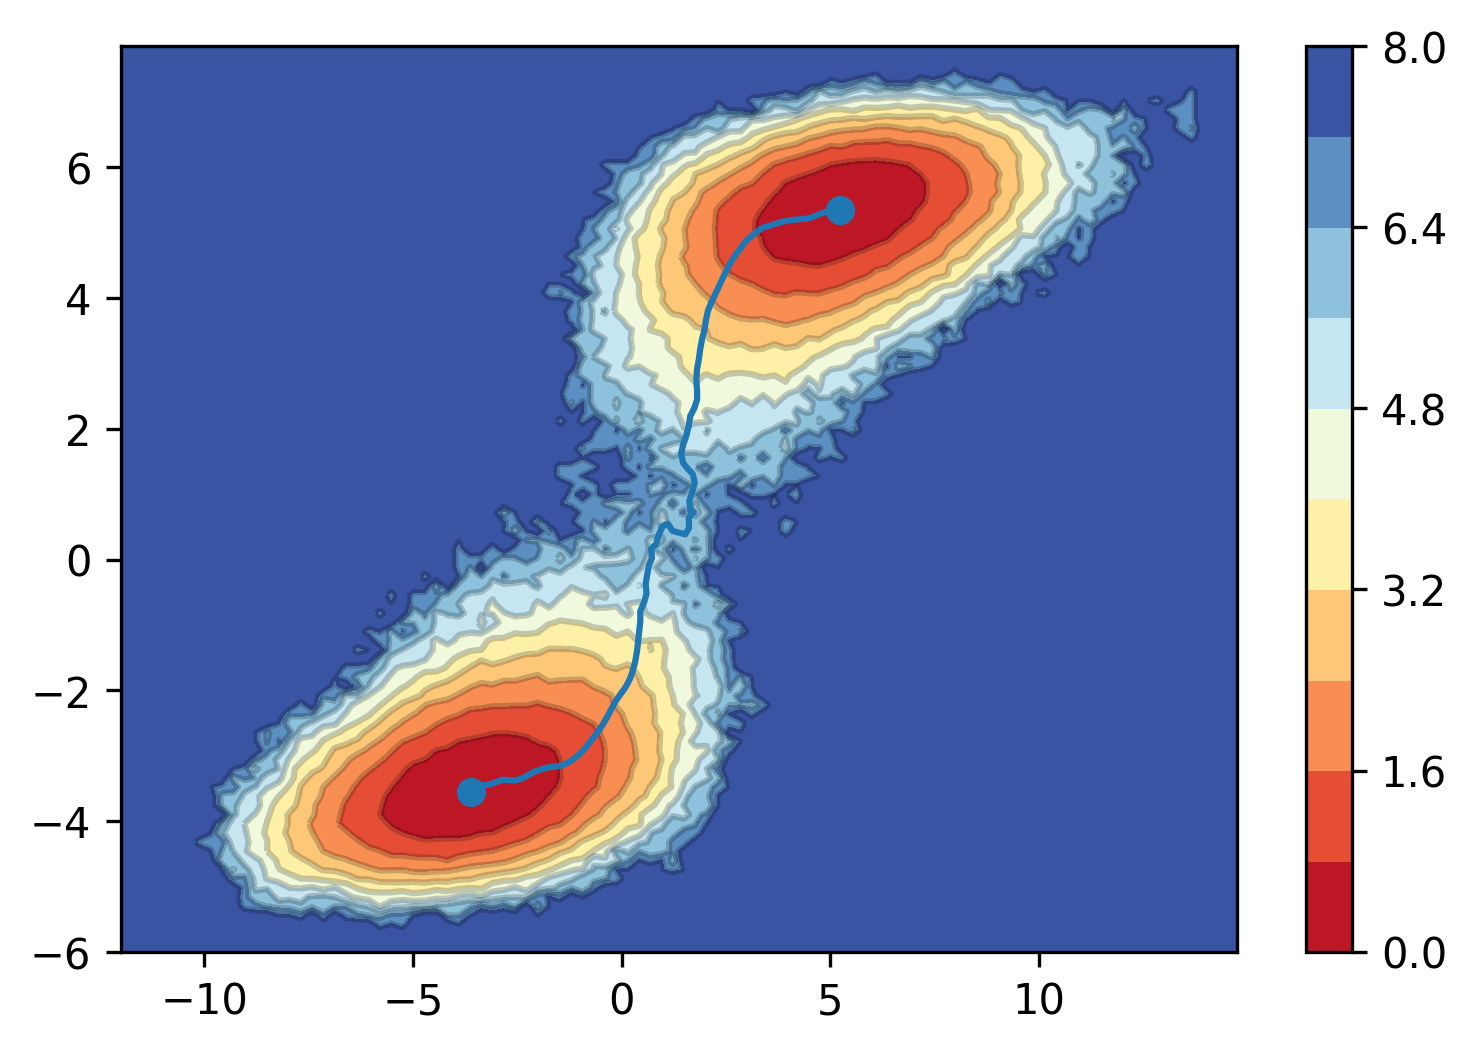

In [7]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee93ddcb50>)

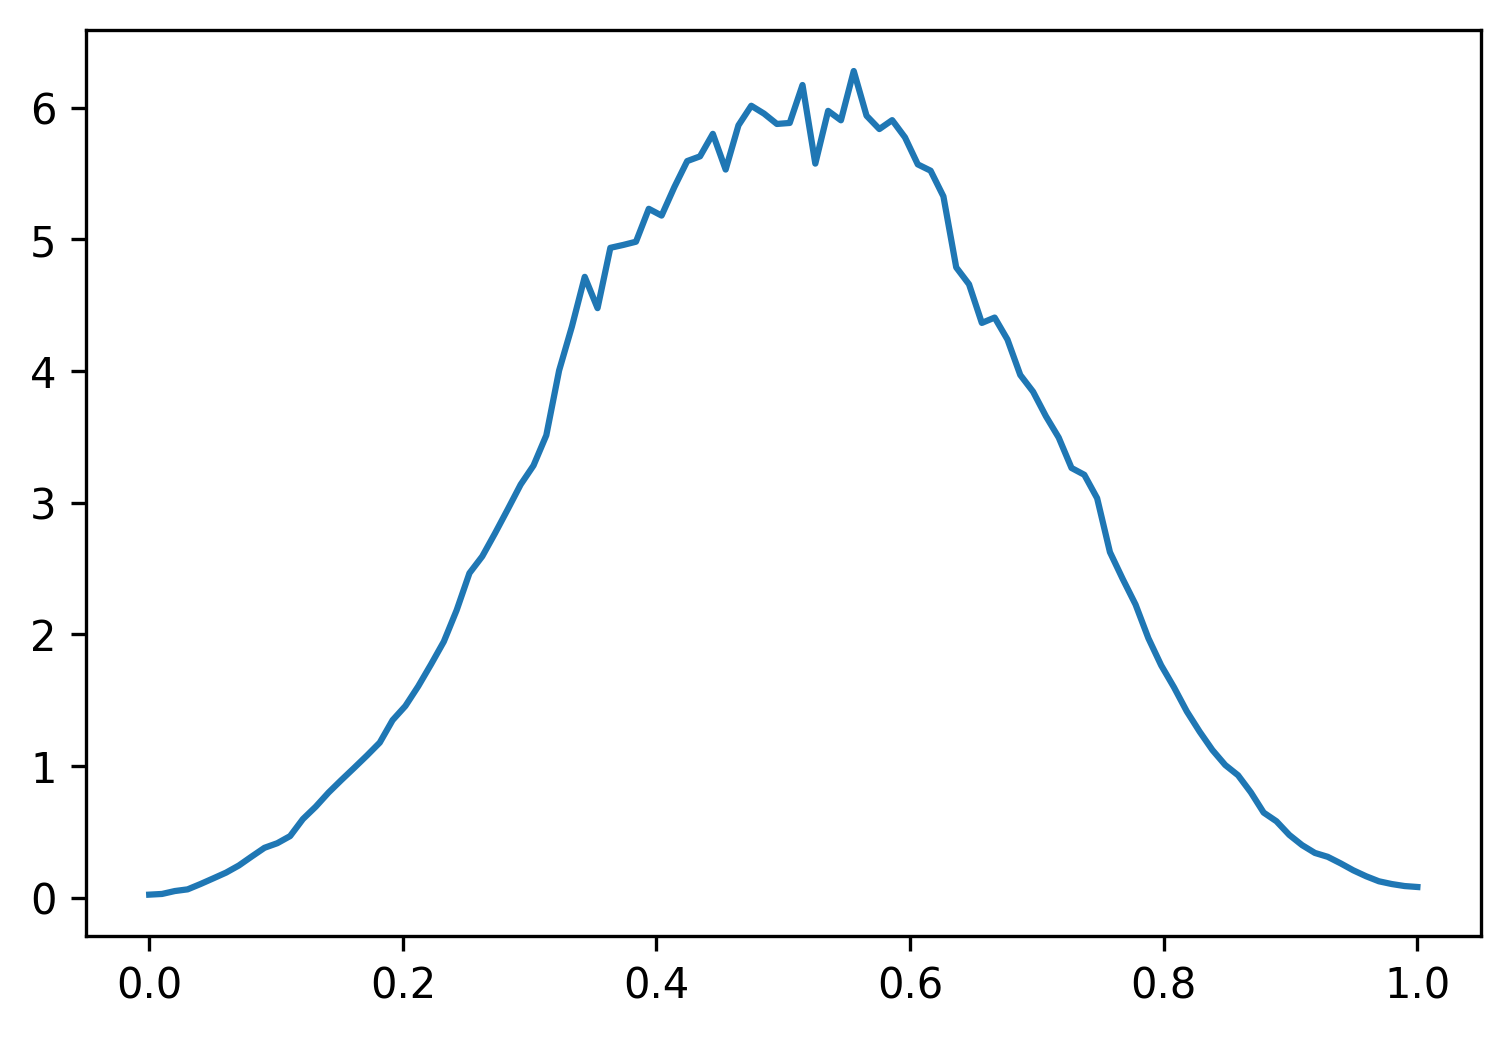

In [8]:
S.plot_mep_energy_profile()

### Comparison against analytical potential

In [9]:
def slip_bond(x, y):
    force_x=0
    force_y=0
    y_0=1
    y_scale=5
    y_shift=4
    xy_0=0
    xy_scale=2
    return ((y - y_0) ** 2 / y_scale - y_shift) ** 2 + (x - y - xy_0) ** 2 / xy_scale - force_x * x - force_y * y

In [10]:
x = np.linspace(-12, 15, 100)
y = np.linspace(-6, 8, 100)
xx, yy = np.meshgrid(x, y)
V = 1000 / (8.314 * 300) * slip_bond(xx, yy)

In [11]:
S = stringmethod.String2D(x, y, V)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee94615490>)

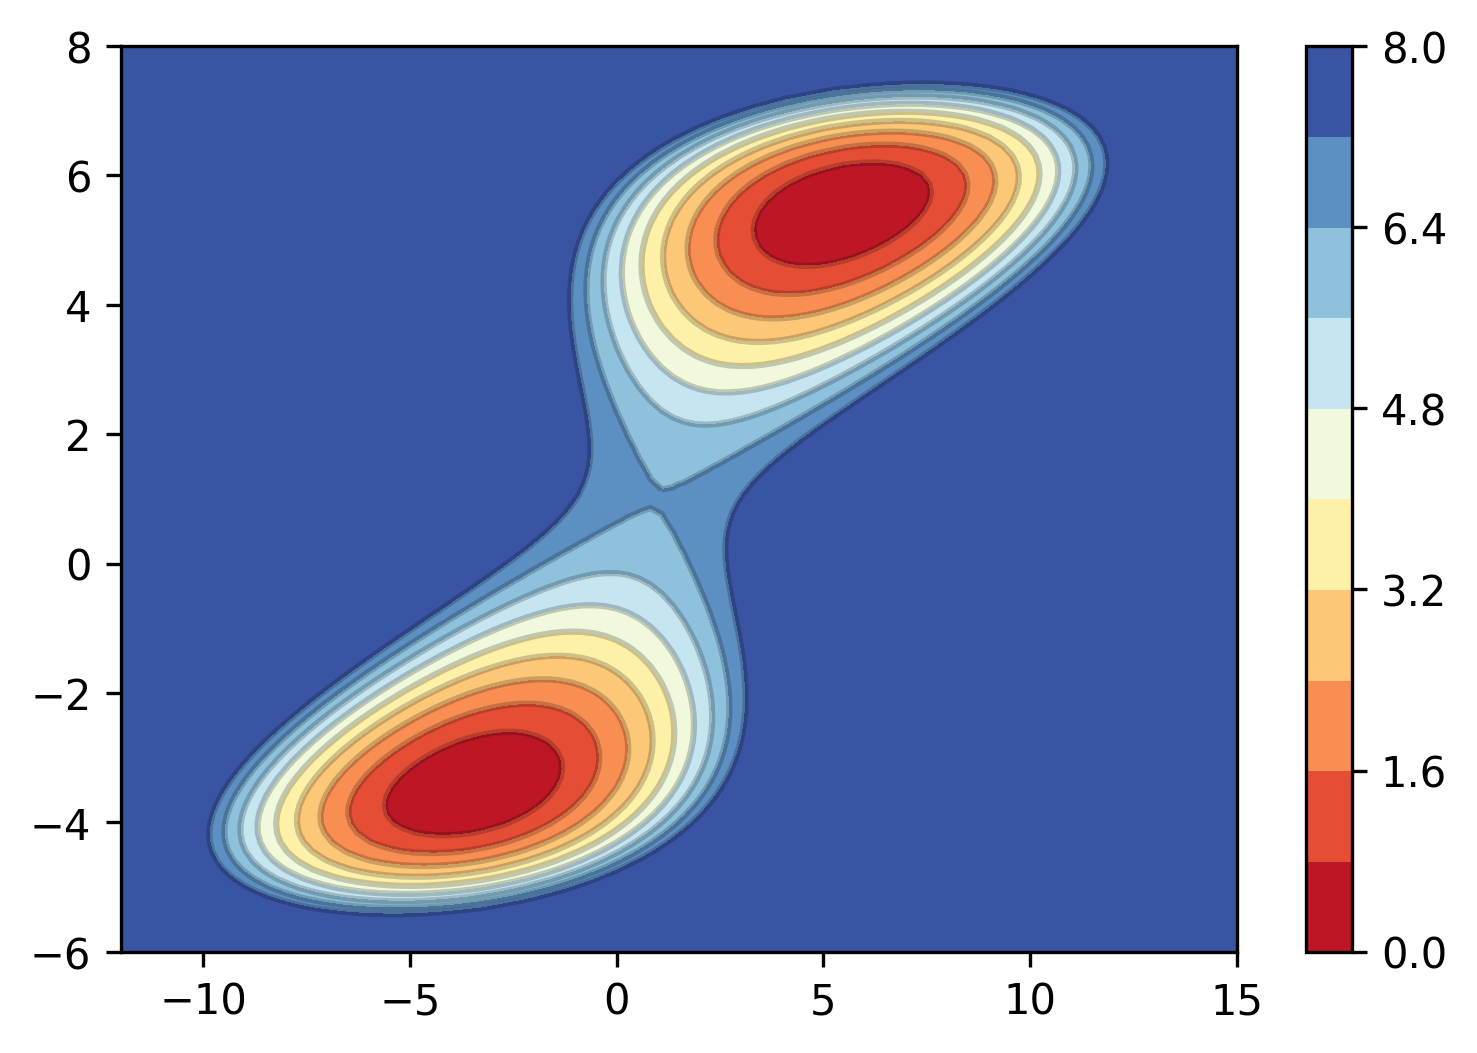

In [12]:
S.plot_V(clip_max=8, levels=10)

In [13]:
S.compute_mep(begin=[-4, -4], end=[5, 6], maxsteps=50, traj_every=10)

 20%|████████▌                                  | 10/50 [00:04<00:16,  2.37it/s]

Change in string: 0.0162971421


 40%|█████████████████▏                         | 20/50 [00:09<00:15,  1.95it/s]

Change in string: 0.0074883819


 60%|█████████████████████████▊                 | 30/50 [00:13<00:08,  2.32it/s]

Change in string: 0.0039126800


 80%|██████████████████████████████████▍        | 40/50 [00:17<00:04,  2.28it/s]

Change in string: 0.0022167678


100%|███████████████████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]

Change in string: 0.0013038186


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee94a79890>)

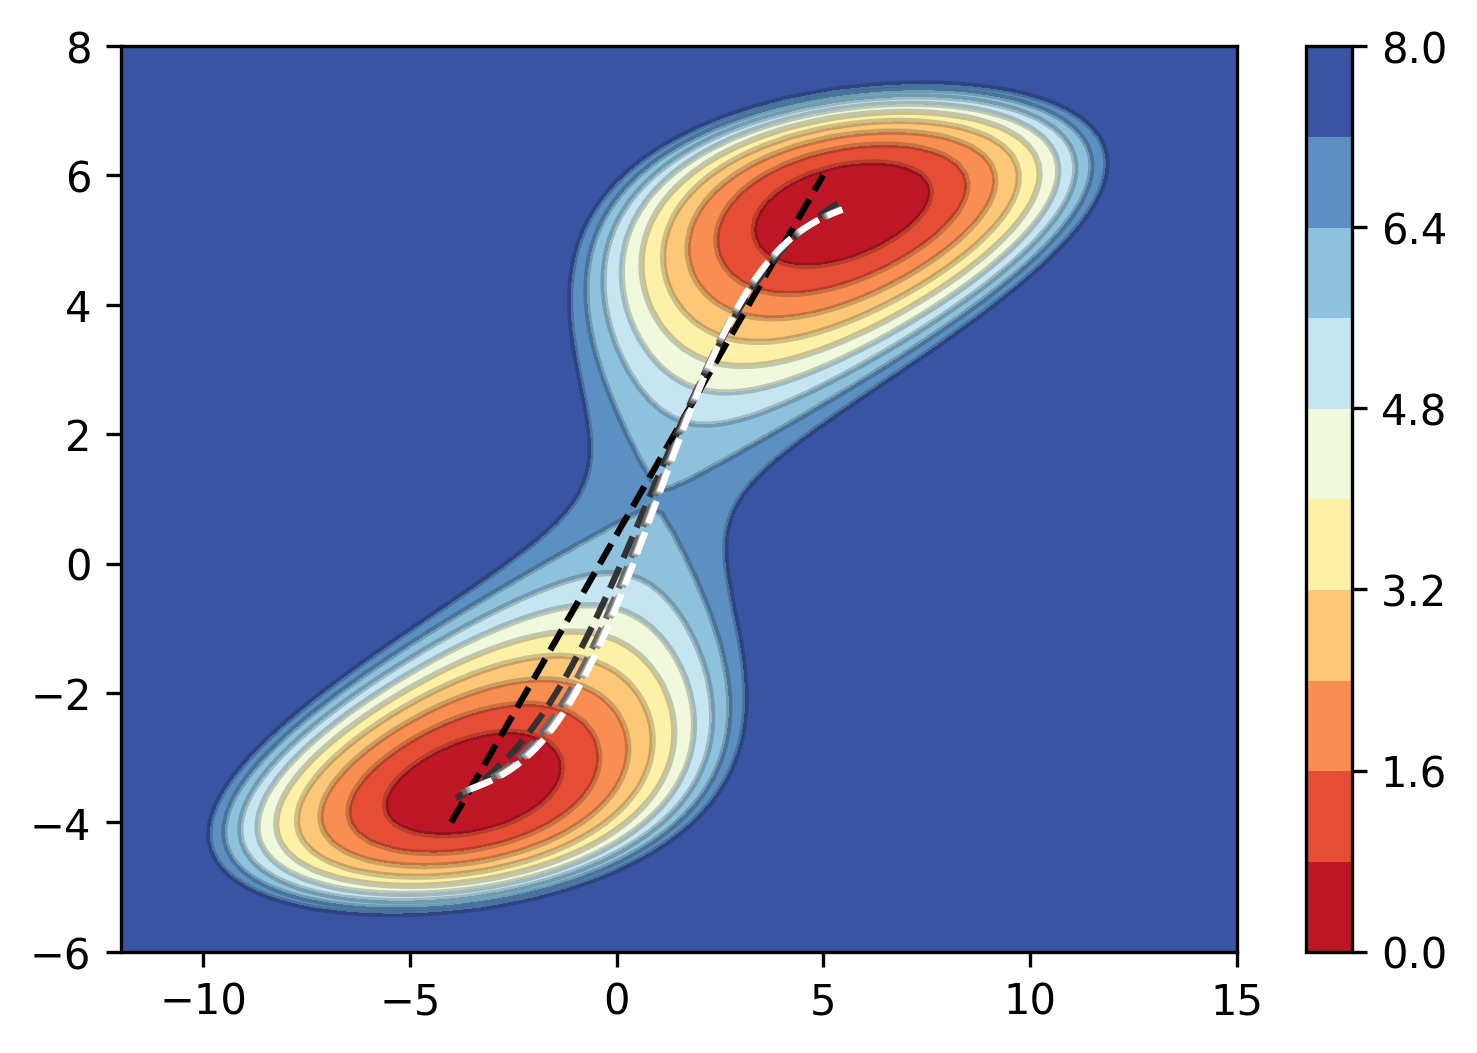

In [14]:
S.plot_string_evolution(clip_max=8, levels=10)

(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fee95b07210>)

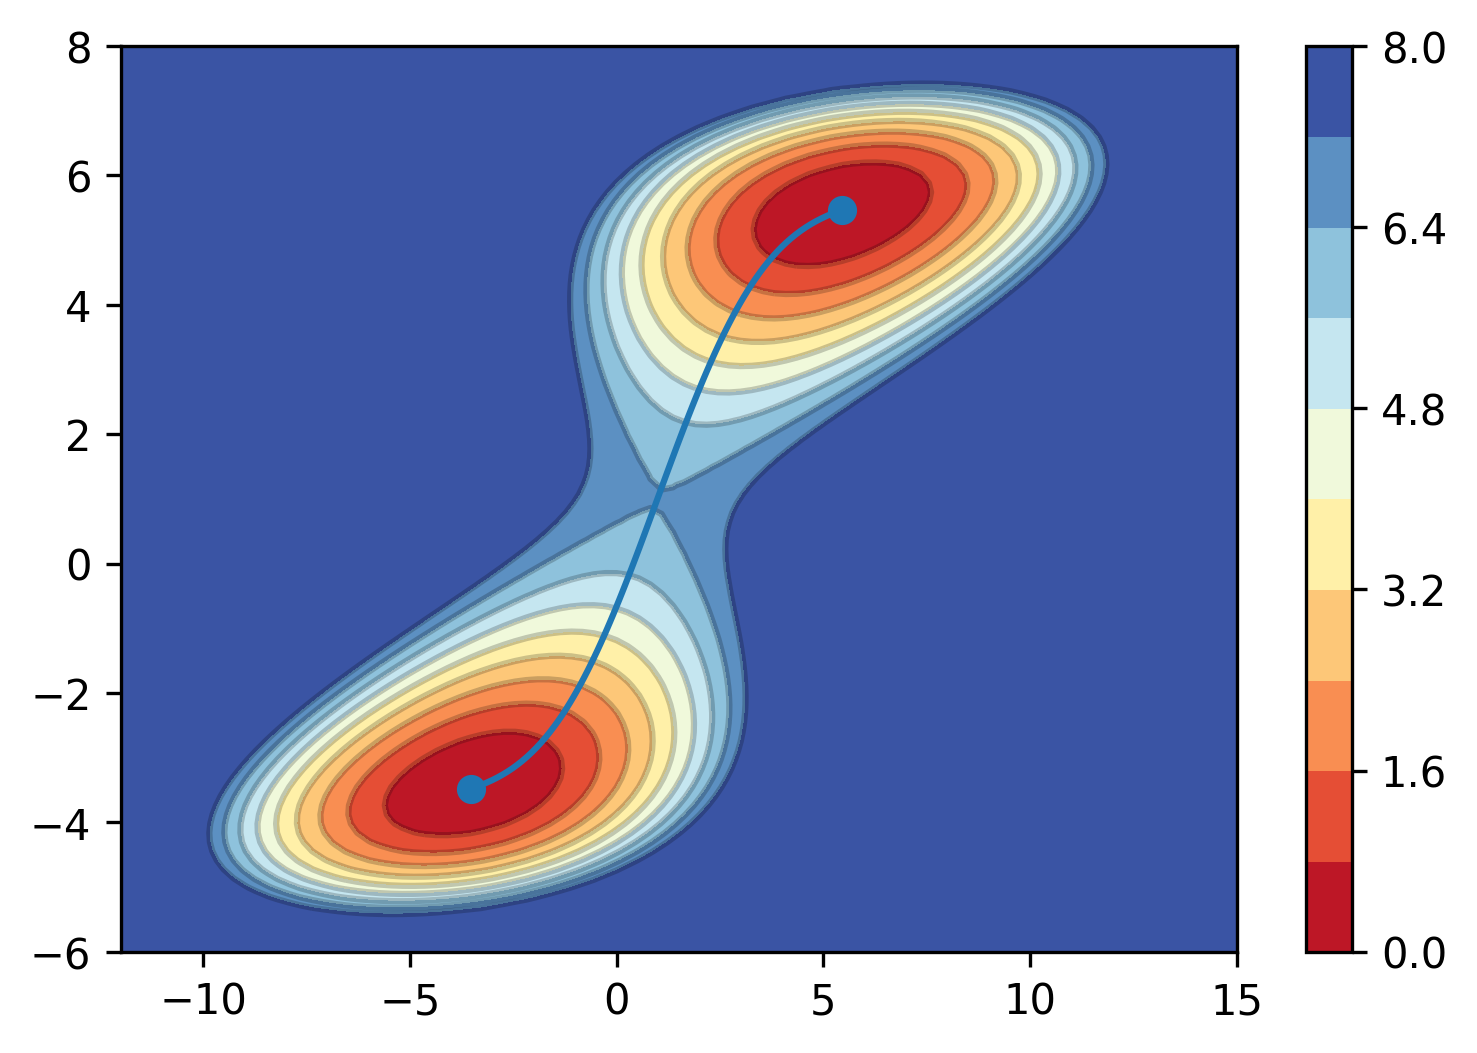

In [15]:
S.plot_mep(clip_max=8, levels=10)

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee95b6cf10>)

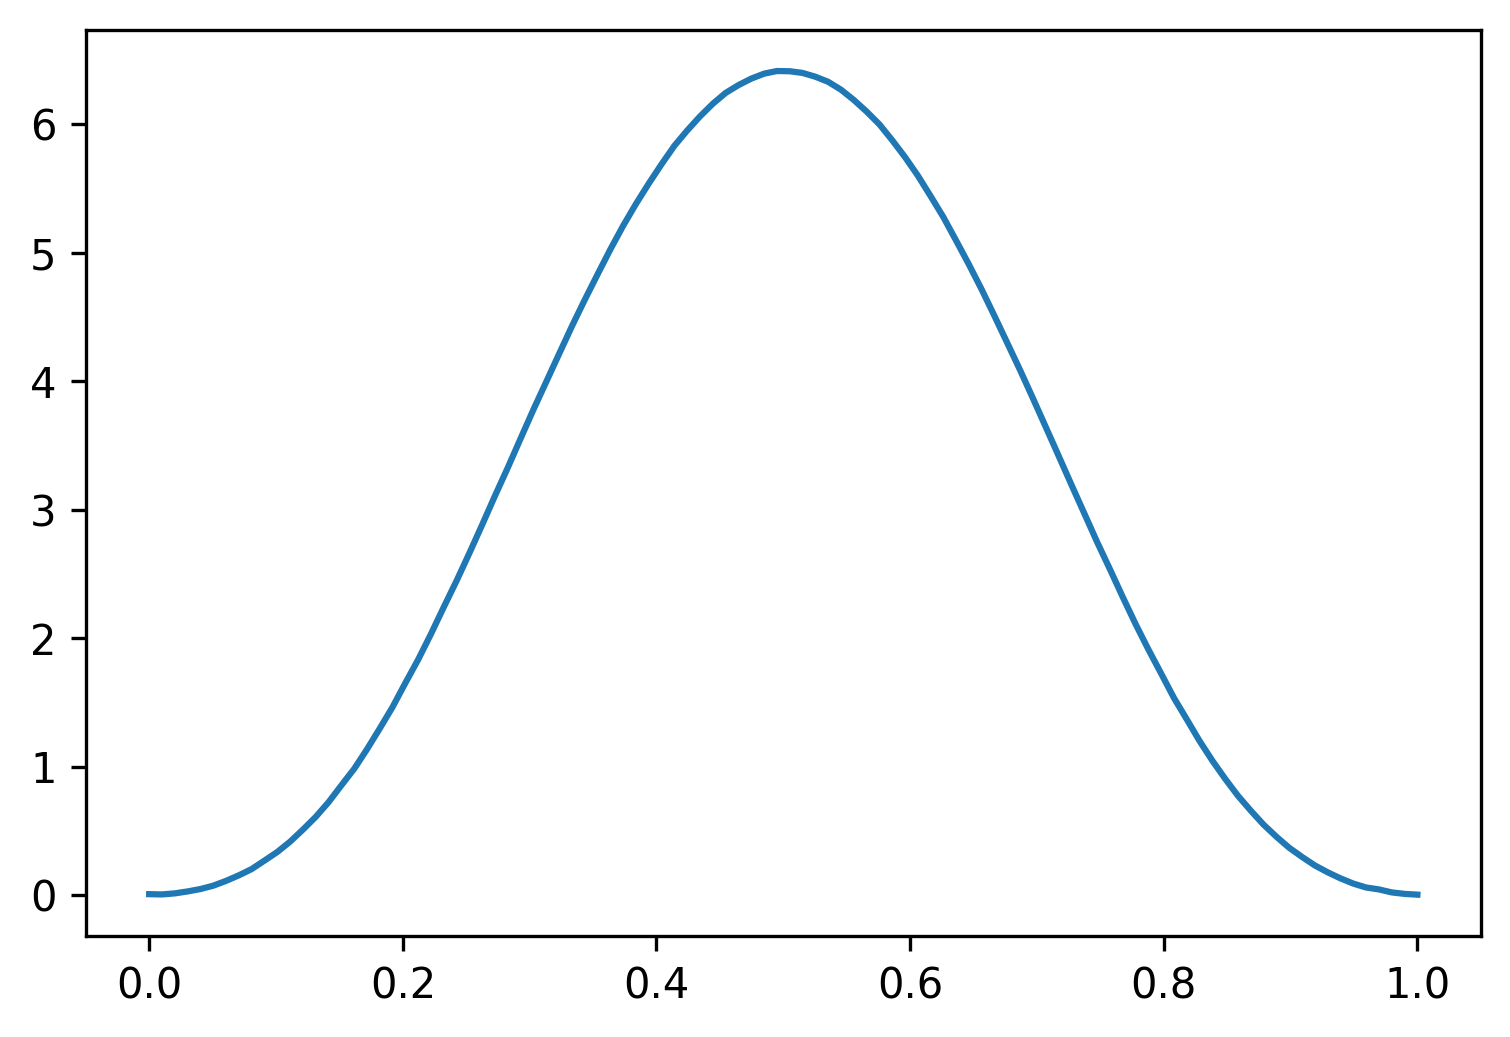

In [16]:
S.plot_mep_energy_profile()